# NDVI FUERA
Objectivo: Limpiza y analisis exploratorio de datos
Proyecto: Análisis espacio-temporal de la distribución de la cobertura de suelo y dinámicas de la vegetación en zonas de interés para la conservación en el centro-este del estado de Sonora.
Fecha: 21/01/2022

Equipo:

* Martha Juarez
* Adilene
* Paola
* Benjamin
* Carlos Velazquez
* Ibsan Morales
* Manuel
* Samuel Cortez

### Carga Librerias

In [39]:
#tratamiento y operacion de los datos
import pandas as pd
import numpy as np
#visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
#datos nulos
import missingno as msno
#system
import os

In [16]:
#configuracion
plt.style.use('ggplot')
main_path='./NDVI_FUERA/'
file_list_csv = os.listdir(main_path)

### Carga de datos

In [17]:
data_df = pd.DataFrame()
for file in file_list_csv:
    df_new = pd.read_csv(main_path+file,
                            sep = ',',
                            index_col= None,
                            encoding= 'utf-8')
    df_new['CAT'] = len(df_new)*[file.strip('.csv')]
    data_df = pd.concat([data_df, df_new],axis=0)


In [18]:
data_df.head()

,X,Y,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,...,28-ago..5,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,01-ene.,CAT
0,687960.458,3249899.077,2726,2804,2824,2294,2296,2201,2321,2811,...,5687,4872,4627,4379,4358,4175,4230,4171,4152,ENCINAR
1,692586.409,3246815.110,3118,3335,3251,2764,2503,2510,2690,3073,...,7131,5870,5079,4651,4455,4275,4296,4206,4279,ENCINAR
2,692806.692,3245713.693,3093,3447,3087,2559,2524,2387,2544,2578,...,7207,6544,5694,5269,4967,4703,4928,4783,4817,ENCINAR
3,696551.509,3244832.560,2955,3724,3233,2899,2413,2410,2665,3159,...,7297,6729,5851,5222,4878,4513,4622,4459,4416,ENCINAR
4,695450.093,3243951.426,3075,4117,3563,3449,2684,2436,2787,3931,...,7802,7261,5888,5235,4869,4624,4760,4633,4682,ENCINAR


In [34]:
data_df.shape

(328, 484)

Categorias de vegetacion

In [19]:
CAT = data_df['CAT'].unique().tolist()
CAT


['ENCINAR',
 'MATSUB',
 'MATXERO',
 'MEZQUITAL',
 'PASTINDU',
 'PASTIZAL',
 'VEGARRO']

### Limpieza

In [20]:
data_null = data_df.isnull().sum(axis = 0).sort_values(ascending = True)

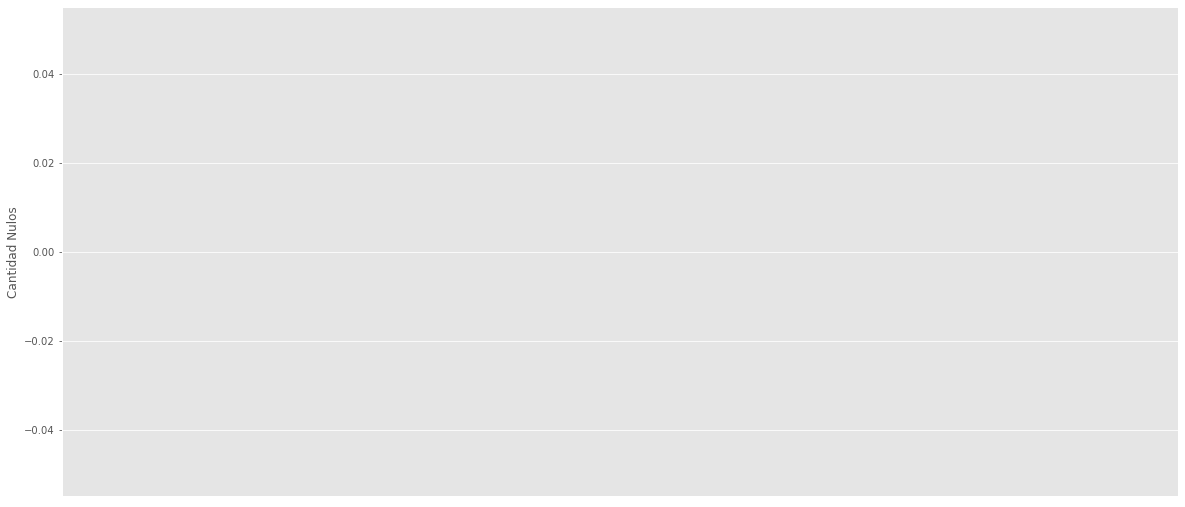

In [22]:
fig_null, ax_null = plt.subplots(nrows=1, ncols = 1, figsize = (20,9))
data_null.plot(kind = 'bar', 
               ax = ax_null)
ax_null.xaxis.set_visible(False)
#ax_null.set_xlabel('Columnas')
ax_null.set_ylabel('Cantidad Nulos')
plt.show()

In [23]:
# Se eliminan datos nulos 
data_df.dropna(how = 'any', inplace = True)

In [24]:
data_df_2 = data_df.copy()
data_df_2.loc[:,'XY'] = data_df_2[['X','Y']].apply(lambda s: tuple(s), axis = 1)

In [25]:
data_df_2.drop(columns=['X','Y'], inplace = True)

In [26]:
data_df_2.head()

,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,25-jun.,11-jul.,...,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,01-ene.,CAT,XY
0,2726,2804,2824,2294,2296,2201,2321,2811,4162,5091,...,4872,4627,4379,4358,4175,4230,4171,4152,ENCINAR,"(687960.458, 3249899.077)"
1,3118,3335,3251,2764,2503,2510,2690,3073,5987,5458,...,5870,5079,4651,4455,4275,4296,4206,4279,ENCINAR,"(692586.409, 3246815.11)"
2,3093,3447,3087,2559,2524,2387,2544,2578,4986,5946,...,6544,5694,5269,4967,4703,4928,4783,4817,ENCINAR,"(692806.692, 3245713.693)"
3,2955,3724,3233,2899,2413,2410,2665,3159,6509,6937,...,6729,5851,5222,4878,4513,4622,4459,4416,ENCINAR,"(696551.509, 3244832.56)"
4,3075,4117,3563,3449,2684,2436,2787,3931,6844,7160,...,7261,5888,5235,4869,4624,4760,4633,4682,ENCINAR,"(695450.093, 3243951.426)"


In [27]:
list_fechas = data_df_2.columns[:-2].values.tolist()

In [28]:
#Diccionaro fechas
dict_fechas = {'ene':'01',
               'feb':'02',
               'mar':'03',
               'abr':'04',
               'may':'05',
               'jun':'06',
               'jul':'07',
               'ago':'08',
               'sep':'09',
               'oct':'10',
               'nov':'11',
               'dic':'12'}
# Formato fechas 
fecha_format = []
year = 2000
num_mes_ini = 1
for fecha in list_fechas:
    mes = fecha.split('.')[0].split('-')[1]
    num_mes = float(dict_fechas[mes].split('.')[0])
    if num_mes < num_mes_ini:
        year += 1
    
    fecha_format.append(fecha.replace(mes, dict_fechas[mes]).split('.')[0] + '-' + str(year))
    num_mes_ini = num_mes

date_time = pd.to_datetime(fecha_format, format = '%d-%m-%Y')

In [29]:
date_time

DatetimeIndex(['2000-02-18', '2000-03-05', '2000-03-21', '2000-04-06',
               '2000-04-22', '2000-05-08', '2000-05-24', '2000-06-09',
               '2000-06-25', '2000-07-11',
               ...
               '2020-08-12', '2020-08-28', '2020-09-13', '2020-09-29',
               '2020-10-15', '2020-10-31', '2020-11-16', '2020-12-02',
               '2020-12-18', '2021-01-01'],
              dtype='datetime64[ns]', length=481, freq=None)

Cambion en formato de fecha

In [31]:
rename_col_fecha = dict(zip(list_fechas, fecha_format))
data_df_2.rename(columns= rename_col_fecha, inplace = True)
data_df_2.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT,XY
0,2726,2804,2824,2294,2296,2201,2321,2811,4162,5091,...,4872,4627,4379,4358,4175,4230,4171,4152,ENCINAR,"(687960.458, 3249899.077)"
1,3118,3335,3251,2764,2503,2510,2690,3073,5987,5458,...,5870,5079,4651,4455,4275,4296,4206,4279,ENCINAR,"(692586.409, 3246815.11)"
2,3093,3447,3087,2559,2524,2387,2544,2578,4986,5946,...,6544,5694,5269,4967,4703,4928,4783,4817,ENCINAR,"(692806.692, 3245713.693)"
3,2955,3724,3233,2899,2413,2410,2665,3159,6509,6937,...,6729,5851,5222,4878,4513,4622,4459,4416,ENCINAR,"(696551.509, 3244832.56)"
4,3075,4117,3563,3449,2684,2436,2787,3931,6844,7160,...,7261,5888,5235,4869,4624,4760,4633,4682,ENCINAR,"(695450.093, 3243951.426)"


In [32]:
data_df_3 = data_df_2.copy()
data_df_4 = data_df_3.set_index('XY')
data_df_4.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT
XY,,,,,,,,,,,,,,,,,,,,,
"(687960.458, 3249899.077)",2726,2804,2824,2294,2296,2201,2321,2811,4162,5091,...,5687,4872,4627,4379,4358,4175,4230,4171,4152,ENCINAR
"(692586.409, 3246815.11)",3118,3335,3251,2764,2503,2510,2690,3073,5987,5458,...,7131,5870,5079,4651,4455,4275,4296,4206,4279,ENCINAR
"(692806.692, 3245713.693)",3093,3447,3087,2559,2524,2387,2544,2578,4986,5946,...,7207,6544,5694,5269,4967,4703,4928,4783,4817,ENCINAR
"(696551.509, 3244832.56)",2955,3724,3233,2899,2413,2410,2665,3159,6509,6937,...,7297,6729,5851,5222,4878,4513,4622,4459,4416,ENCINAR
"(695450.093, 3243951.426)",3075,4117,3563,3449,2684,2436,2787,3931,6844,7160,...,7802,7261,5888,5235,4869,4624,4760,4633,4682,ENCINAR


In [33]:
list_posxy = data_df_4.index.values.tolist()
rename_index = {index : 'posXY_'+str(i) for i, index in enumerate(list_posxy)}
data_df_4.rename(index = rename_index, inplace = True)
data_df_4.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT
XY,,,,,,,,,,,,,,,,,,,,,
posXY_0,2726,2804,2824,2294,2296,2201,2321,2811,4162,5091,...,5687,4872,4627,4379,4358,4175,4230,4171,4152,ENCINAR
posXY_1,3118,3335,3251,2764,2503,2510,2690,3073,5987,5458,...,7131,5870,5079,4651,4455,4275,4296,4206,4279,ENCINAR
posXY_2,3093,3447,3087,2559,2524,2387,2544,2578,4986,5946,...,7207,6544,5694,5269,4967,4703,4928,4783,4817,ENCINAR
posXY_3,2955,3724,3233,2899,2413,2410,2665,3159,6509,6937,...,7297,6729,5851,5222,4878,4513,4622,4459,4416,ENCINAR
posXY_4,3075,4117,3563,3449,2684,2436,2787,3931,6844,7160,...,7802,7261,5888,5235,4869,4624,4760,4633,4682,ENCINAR


### Agrupamiento

In [35]:
data_group = data_df_4.groupby('CAT')
data_group.agg([np.median, np.std])

18-02-2000             5-03-2000             21-03-2000              \
              median         std    median         std     median         std   
CAT                                                                             
ENCINAR       3499.0  471.347095    3634.5  450.546812     3271.5  368.030111   
MATSUB        2935.0  297.602250    3198.0  278.879923     3143.0  245.845489   
MATXERO       2239.0  219.712511    2397.0  301.700935     2364.0  256.409177   
MEZQUITAL     2357.0  203.634135    2502.5  258.070604     2400.0  191.592911   
PASTINDU      2464.0  147.081332    2508.5  190.895482     2499.0  156.999438   
PASTIZAL      2623.0  235.621457    2772.0  229.813921     2582.0  210.605511   
VEGARRO       2905.0  310.761597    3255.0  406.694582     3232.0  280.878789   

          6-04-2000             22-04-2000              ... 31-10-2020  \
             median         std     median         std  ...     median   
CAT                                                     ...              
ENCINAR      2897.0  217.925123     2587.5  168.482810  ...     4626.0   
MATSUB       2881.0  226.731721     2686.0  194.825793  ...     4104.0   
MATXERO      2194.5  254.851608     2055.0  295.618334  ...     3638.0   
MEZQUITAL    2281.0  213.452151     2122.0  194.538372  ...     3356.0   
PASTINDU     2310.0  185.547063     2242.5  189.124367  ...     3365.0   
PASTIZAL     2382.0  164.639372     2246.0  163.877130  ...     3863.0   
VEGARRO      2873.0  214.955976     2745.5  232.788011  ...     4406.0   

                      16-11-2020             2-12-2020             18-12-2020  \
                  std     median         std    median         std     median   
CAT                                                                             
ENCINAR    568.902175     4316.0  468.534466    4437.0  506.441001     4337.5   
MATSUB     276.611077     3844.0  268.353630    3951.0  273.631310     3926.0   
MATXERO    467.513378     3332.0  432.736816    3484.0  411.108312     3526.0   
MEZQUITAL  394.998554     3135.0  398.381699    3128.0  368.004685     3155.5   
PASTINDU    89.180510     3115.0  142.077030    3224.0  135.929684     3218.0   
PASTIZAL   327.965406     3692.0  276.087008    3683.0  307.571038     3588.0   
VEGARRO    405.180056     4173.5  381.894677    4204.5  394.754772     4183.5   

                      01-01-2021              
                  std     median         std  
CAT                                           
ENCINAR    503.766827     4271.5  490.200881  
MATSUB     277.918715     3790.0  259.921734  
MATXERO    445.710400     3467.5  493.400301  
MEZQUITAL  344.660146     2904.0  354.648241  
PASTINDU   142.833053     3077.5  146.968006  
PASTIZAL   322.395749     3524.0  328.981429  
VEGARRO    367.668974     3990.5  449.848970  

[7 rows x 962 columns]

In [36]:
describe_data_group = data_group.agg([np.median, np.std]).T
describe_data_group.head()

CAT                    ENCINAR       MATSUB      MATXERO    MEZQUITAL  \
18-02-2000 median  3499.000000  2935.000000  2239.000000  2357.000000   
           std      471.347095   297.602250   219.712511   203.634135   
5-03-2000  median  3634.500000  3198.000000  2397.000000  2502.500000   
           std      450.546812   278.879923   301.700935   258.070604   
21-03-2000 median  3271.500000  3143.000000  2364.000000  2400.000000   

CAT                   PASTINDU     PASTIZAL      VEGARRO  
18-02-2000 median  2464.000000  2623.000000  2905.000000  
           std      147.081332   235.621457   310.761597  
5-03-2000  median  2508.500000  2772.000000  3255.000000  
           std      190.895482   229.813921   406.694582  
21-03-2000 median  2499.000000  2582.000000  3232.000000

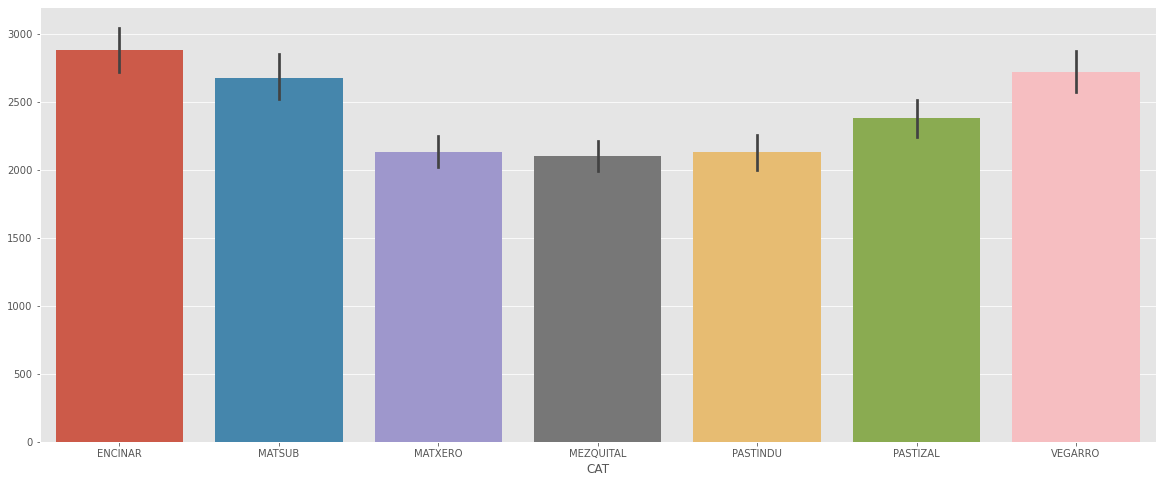

In [40]:
fig_group, ax_group = plt.subplots(nrows = 1, ncols = 1, figsize = (20,8))
sns.barplot(data = describe_data_group, ax = ax_group)
plt.show()

In [41]:
ENCINAR_df = data_group.get_group('ENCINAR')
ENCINAR_df.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT
XY,,,,,,,,,,,,,,,,,,,,,
posXY_0,2726,2804,2824,2294,2296,2201,2321,2811,4162,5091,...,5687,4872,4627,4379,4358,4175,4230,4171,4152,ENCINAR
posXY_1,3118,3335,3251,2764,2503,2510,2690,3073,5987,5458,...,7131,5870,5079,4651,4455,4275,4296,4206,4279,ENCINAR
posXY_2,3093,3447,3087,2559,2524,2387,2544,2578,4986,5946,...,7207,6544,5694,5269,4967,4703,4928,4783,4817,ENCINAR
posXY_3,2955,3724,3233,2899,2413,2410,2665,3159,6509,6937,...,7297,6729,5851,5222,4878,4513,4622,4459,4416,ENCINAR
posXY_4,3075,4117,3563,3449,2684,2436,2787,3931,6844,7160,...,7802,7261,5888,5235,4869,4624,4760,4633,4682,ENCINAR


In [42]:
ENCINAR_df_2 = ENCINAR_df.copy()

In [43]:
ENCINAR_df_3 = ENCINAR_df_2.iloc[:,:-1].transpose()
ENCINAR_df_3.head()

XY,posXY_0,posXY_1,posXY_2,posXY_3,posXY_4,posXY_5,posXY_6,posXY_7,posXY_8,posXY_9,...,posXY_50,posXY_51,posXY_52,posXY_53,posXY_54,posXY_55,posXY_56,posXY_57,posXY_58,posXY_59
18-02-2000,2726,3118,3093,2955,3075,2573,2748,2816,2888,2759,...,3223,4278,3198,3600,4196,3620,3778,3916,3689,3668
5-03-2000,2804,3335,3447,3724,4117,3125,3784,3577,3315,3523,...,3345,4170,3286,3824,3989,3586,3424,4244,3697,3665
21-03-2000,2824,3251,3087,3233,3563,3025,3542,3176,3344,2938,...,3463,3833,2773,3517,3321,3191,3248,3895,3132,3096
6-04-2000,2294,2764,2559,2899,3449,2589,2935,2987,3024,2743,...,2403,2924,2754,3047,3204,2963,2994,3256,2779,2813
22-04-2000,2296,2503,2524,2413,2684,2521,2738,2551,2642,2514,...,2249,2740,2399,2806,2675,2833,2831,2847,2820,2533


In [44]:
ENCINAR_df_3.rename_axis('Fecha', axis = 'index', inplace = True)
ENCINAR_df_3.head()

XY,posXY_0,posXY_1,posXY_2,posXY_3,posXY_4,posXY_5,posXY_6,posXY_7,posXY_8,posXY_9,...,posXY_50,posXY_51,posXY_52,posXY_53,posXY_54,posXY_55,posXY_56,posXY_57,posXY_58,posXY_59
Fecha,,,,,,,,,,,,,,,,,,,,,
18-02-2000,2726,3118,3093,2955,3075,2573,2748,2816,2888,2759,...,3223,4278,3198,3600,4196,3620,3778,3916,3689,3668
5-03-2000,2804,3335,3447,3724,4117,3125,3784,3577,3315,3523,...,3345,4170,3286,3824,3989,3586,3424,4244,3697,3665
21-03-2000,2824,3251,3087,3233,3563,3025,3542,3176,3344,2938,...,3463,3833,2773,3517,3321,3191,3248,3895,3132,3096
6-04-2000,2294,2764,2559,2899,3449,2589,2935,2987,3024,2743,...,2403,2924,2754,3047,3204,2963,2994,3256,2779,2813
22-04-2000,2296,2503,2524,2413,2684,2521,2738,2551,2642,2514,...,2249,2740,2399,2806,2675,2833,2831,2847,2820,2533


In [45]:
ENCINAR_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 18-02-2000 to 01-01-2021
Data columns (total 60 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   posXY_0   481 non-null    int64
 1   posXY_1   481 non-null    int64
 2   posXY_2   481 non-null    int64
 3   posXY_3   481 non-null    int64
 4   posXY_4   481 non-null    int64
 5   posXY_5   481 non-null    int64
 6   posXY_6   481 non-null    int64
 7   posXY_7   481 non-null    int64
 8   posXY_8   481 non-null    int64
 9   posXY_9   481 non-null    int64
 10  posXY_10  481 non-null    int64
 11  posXY_11  481 non-null    int64
 12  posXY_12  481 non-null    int64
 13  posXY_13  481 non-null    int64
 14  posXY_14  481 non-null    int64
 15  posXY_15  481 non-null    int64
 16  posXY_16  481 non-null    int64
 17  posXY_17  481 non-null    int64
 18  posXY_18  481 non-null    int64
 19  posXY_19  481 non-null    int64
 20  posXY_20  481 non-null    int64
 21  posXY_21  481 non-null    in

In [46]:
round(ENCINAR_df_3.describe(),2)

XY,posXY_0,posXY_1,posXY_2,posXY_3,posXY_4,posXY_5,posXY_6,posXY_7,posXY_8,posXY_9,...,posXY_50,posXY_51,posXY_52,posXY_53,posXY_54,posXY_55,posXY_56,posXY_57,posXY_58,posXY_59
count,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,...,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00
mean,4021.99,4726.24,5014.80,5565.02,5381.41,5056.88,5450.01,5144.91,5108.81,4925.30,...,4891.22,5509.96,5001.15,5655.77,5796.26,5142.60,5218.38,5509.17,5041.62,4922.60
std,1233.30,1361.59,1573.24,1688.77,1680.82,1667.27,1679.34,1608.74,1645.78,1677.06,...,1483.32,1583.06,1477.83,1665.23,1682.66,1577.78,1537.72,1587.98,1209.50,1431.96
min,1945.00,2376.00,2316.00,2209.00,2352.00,2320.00,2423.00,2333.00,2361.00,2333.00,...,2129.00,2444.00,2267.00,2478.00,2406.00,2275.00,2472.00,2272.00,2614.00,2406.00
25%,2954.00,3617.00,3727.00,4179.00,4087.00,3806.00,4166.00,3948.00,3902.00,3658.00,...,3673.00,4278.00,3781.00,4387.00,4687.00,3805.00,3955.00,4432.00,4074.00,3801.00
50%,4059.00,4781.00,5132.00,5834.00,5235.00,4865.00,5351.00,5014.00,4870.00,4541.00,...,4866.00,5826.00,5069.00,5863.00,6084.00,4996.00,5111.00,5735.00,5091.00,4884.00
75%,4910.00,5634.00,6282.00,6877.00,6672.00,6090.00,6734.00,6248.00,6294.00,6132.00,...,6027.00,6719.00,6137.00,7020.00,7140.00,6403.00,6380.00,6731.00,6002.00,6036.00
max,7071.00,7700.00,8089.00,8592.00,8772.00,8626.00,8749.00,8537.00,9339.00,8588.00,...,8612.00,8583.00,8040.00,8506.00,8719.00,8470.00,8545.00,8606.00,8070.00,8121.00


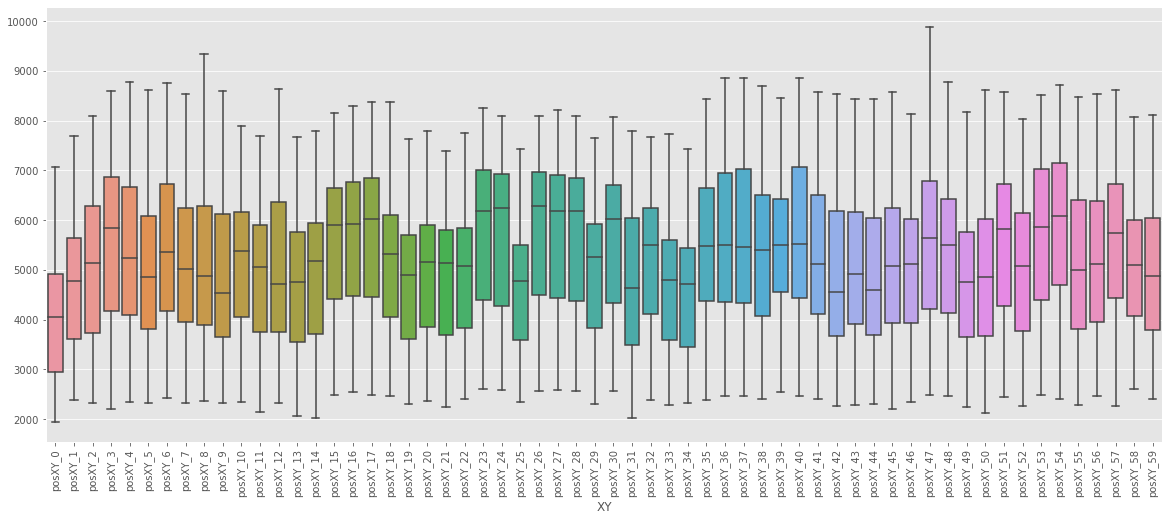

In [47]:
fig_box_E, ax_box_E = plt.subplots(nrows=1, ncols = 1, figsize= (20,8))
sns.boxplot(data = ENCINAR_df_3, ax = ax_box_E)
#plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [48]:
ENCINAR_df_3.index = date_time

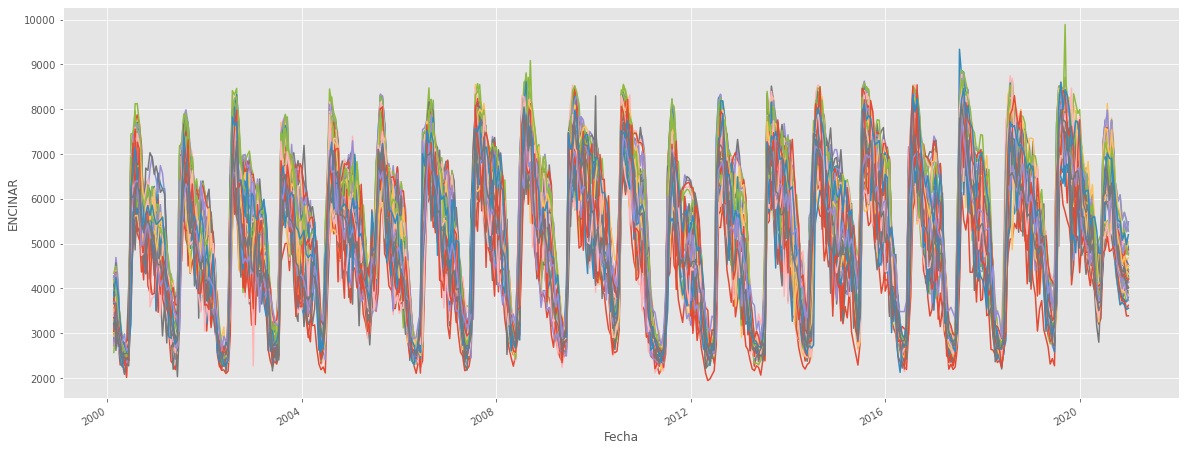

In [49]:
ax_trend = ENCINAR_df_3.plot(kind = 'line', 
                             subplots = False,
                             sharex = True,
                             figsize = (20,8),
                             legend = False)
ax_trend.set_xlabel('Fecha')
ax_trend.set_ylabel('ENCINAR')
plt.show()

### Tendencia por categoria

In [50]:
def ts_group(df_group, cat):
    list_df_group = []
    for element in cat:
        df_ = df_group.get_group(element)
        df_T = df_.iloc[:,:-1].transpose()
        df_T.rename_axis('Fecha', axis = 'index', inplace = True)
        list_df_group.append(df_T)
        
    return list_df_group

In [52]:
list_groups = ts_group(data_group, CAT)

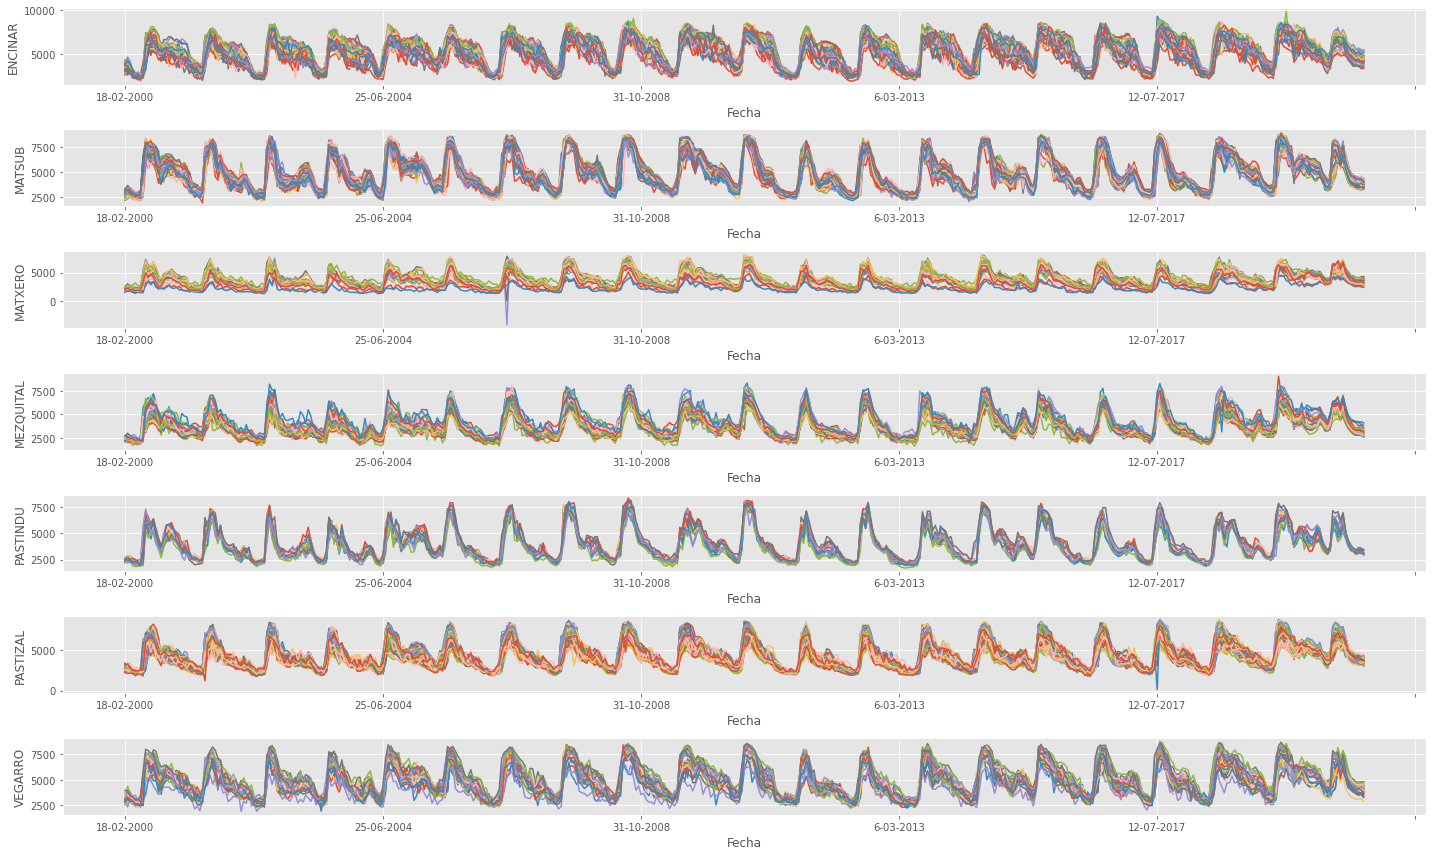

In [53]:
fig_groups, ax_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,12))
for k, df_cat in enumerate(list_groups):
    df_cat.plot(kind = 'line', 
                legend = False, 
                ax = ax_groups[k])
    ax_groups[k].set_xlabel('Fecha')
    ax_groups[k].set_ylabel(CAT[k])
plt.tight_layout()
plt.show()

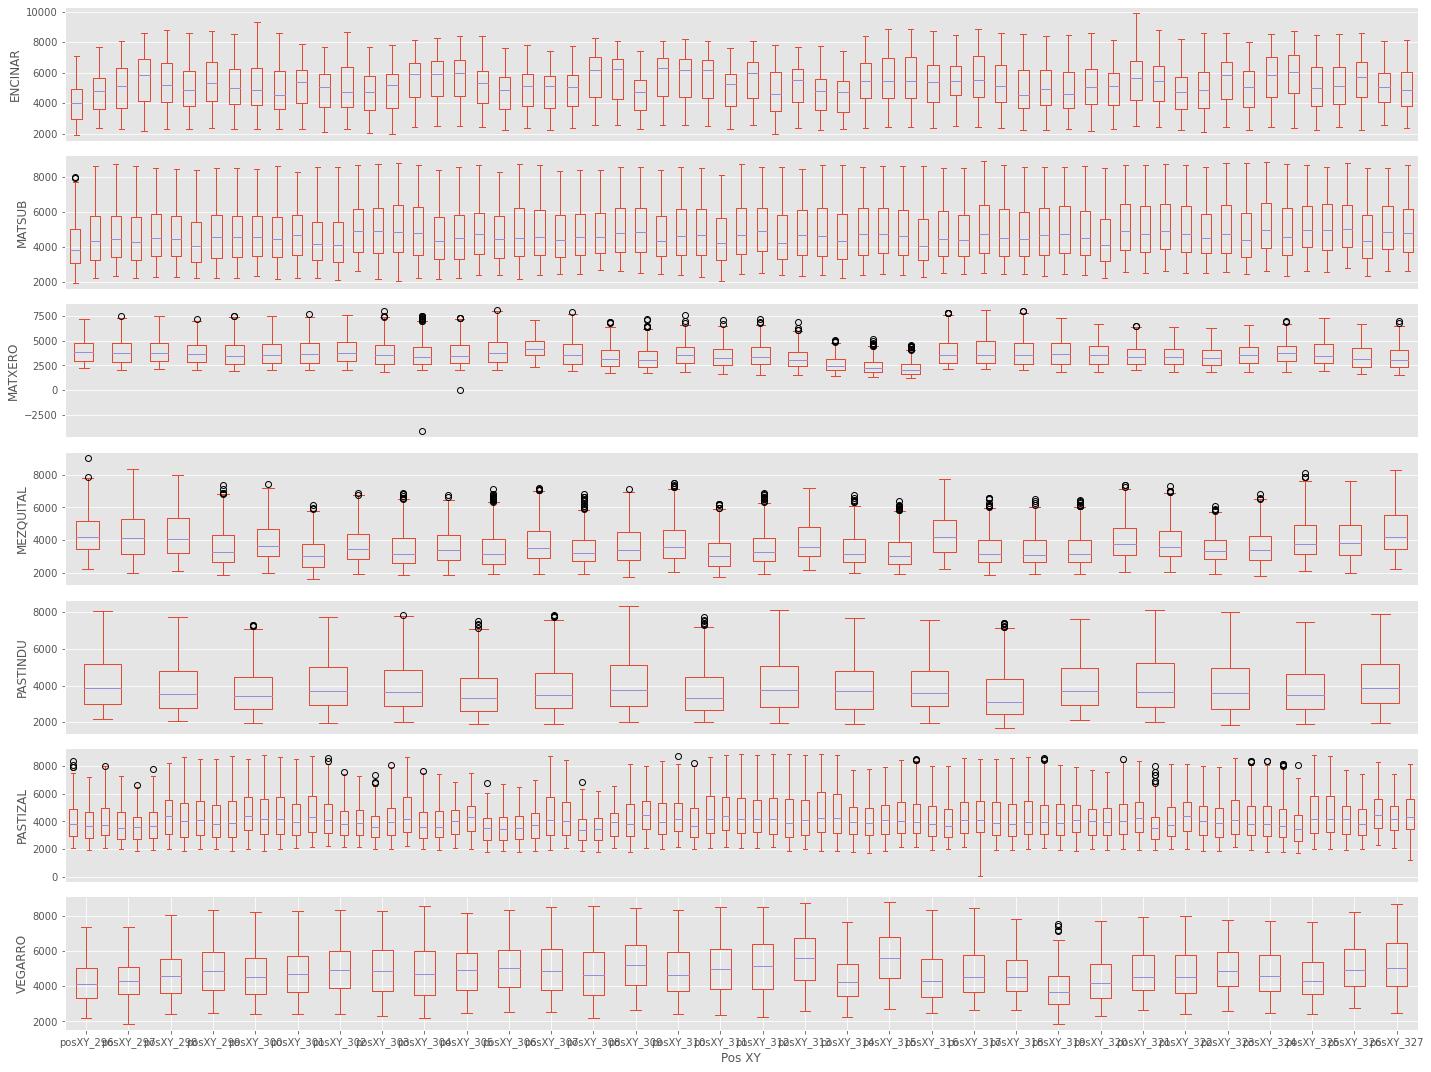

In [54]:
fig_box_groups, ax_box_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,15))
for k, df_cat in enumerate(list_groups):
    df_cat.plot(kind = 'box', 
                legend = False, 
                ax = ax_box_groups[k])
    if k == len(CAT)-1:
        ax_box_groups[k].set_xlabel('Pos XY')
    else:
        ax_box_groups[k].xaxis.set_visible(False)
    
    ax_box_groups[k].set_ylabel(CAT[k])

plt.tight_layout()
plt.show()